### Problem Statement

In this project, we aim to conduct a comprehensive analysis of a dataset focusing on health insurance beneficiaries in the United States. The dataset encompasses various attributes, including:

- **Age**: Reflects the age of the primary beneficiary, representing a wide spectrum of demographics.
- **Sex**: Indicates the gender of the insurance contractor, offering insights into gender-based healthcare disparities.
- **BMI**: Body mass index, providing a holistic view of health and wellness.
- **Children**: Denotes the number of dependents covered by health insurance, shedding light on family dynamics.
- **Smoker**: Indicates smoking habits, a significant factor influencing healthcare costs and outcomes.
- **Region**: Specifies the geographical location of the beneficiary, capturing regional variations in healthcare access and costs.
- **Charges**: Represents individual medical costs billed by health insurance, reflecting the financial aspect of healthcare.

Our overarching objective is to extract actionable insights from this dataset to inform strategic decision-making in the healthcare and insurance sectors. Key objectives include:

1. Exploratory Data Analysis (EDA): Conduct a thorough exploration of the dataset to uncover patterns, trends, and relationships among various attributes.
2. Feature Engineering: Derive new features or transformations to enhance predictive modeling and analysis.
3. Predictive Modeling: Develop robust machine learning models to predict health insurance charges based on demographic, lifestyle, and geographic factors.
4. Interpretation and Insights: Interpret model results and extract actionable insights to guide insurance pricing strategies, healthcare resource allocation, and policy formulation.
5. Ethical Considerations: Address ethical concerns related to fairness, transparency, and privacy in healthcare data analysis.

By addressing these objectives, we aim to contribute to the optimization of healthcare delivery and insurance services, ultimately fostering better health outcomes and financial security for individuals and families across diverse demographic and geographic backgrounds.


### **`Importing Required Liabraries`**

In [63]:
# Importing necessary libraries for numerical operations
import numpy as np
# Importing pandas for data manipulation and analysis
import pandas as pd
# Importing train_test_split function from sklearn.model_selection for splitting data into train and test sets
from sklearn.model_selection import train_test_split, cross_val_score
# Importing LabelEncoder from sklearn.preprocessing for label encoding categorical variables
from sklearn.preprocessing import LabelEncoder
# Importing RandomForestRegressor from sklearn.ensemble for building random forest regression model
from sklearn.ensemble import RandomForestRegressor
# Importing train_test_split function from sklearn.model_selection for splitting data into train and test sets
from sklearn.model_selection import train_test_split as holdout
# Importing LinearRegression from sklearn.linear_model for building linear regression model
from sklearn.linear_model import LinearRegression
# Importing metrics from sklearn for evaluating model performance
from sklearn import metrics
# Importing XGBRegressor from xgboost for building XGBoost regression model
from xgboost import XGBRegressor
# Importing seaborn for data visualization
import seaborn as sns
# Importing matplotlib.pyplot for creating plots
import matplotlib.pyplot as plt
%matplotlib inline
# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")
# Importing Ridge regression model from sklearn.linear_model
from sklearn.linear_model import Ridge
# Importing PolynomialFeatures from sklearn.preprocessing for generating polynomial features
from sklearn.preprocessing import PolynomialFeatures
# Importing Lasso regression model from sklearn.linear_model
from sklearn.linear_model import Lasso
# Importing RandomForestRegressor from sklearn.ensemble for building random forest regression model
from sklearn.ensemble import RandomForestRegressor as rfr
# for making tabular vies of functions
from tabulate import tabulate

# visual report
import dtale

# visual report sweetviz
import sweetviz as sv


## `Exploration of the DATA`

In [64]:
# Load the Data
df=pd.read_csv('insurance.csv')

In [65]:
def explore(df):
    print(f"The top 5 rows of {df} are below".center(82, "~"))
    print(df.head(5))
    print(f"The last 5 rows of {df} are below".center(82, "~"))
    print(df.tail(5))
    print(f"Column-wise sum of missing values in the {df} are below".center(82, "~"))
    print(df.isnull().sum())


In [66]:
from tabulate import tabulate

def explore(df):
    print("~" * 100)
    print(f"{'Top 5 rows of DataFrame':^100}")
    print("~" * 100)
    print(tabulate(df.head(5), headers='keys', tablefmt='grid'))
    
    print("~" * 100)
    print(f"{'Last 5 rows of DataFrame':^100}")
    print("~" * 100)
    print(tabulate(df.tail(5), headers='keys', tablefmt='grid'))
    
    print("~" * 100)
    print(f"{'Summary statistics for DataFrame':^100}")
    print("~" * 100)
    print(tabulate(df.describe(), headers='keys', tablefmt='grid'))
    
    print("~" * 100)
    print(f"{'Column-wise sum of missing values in DataFrame':^100}")
    print("~" * 100)
    print(tabulate(pd.DataFrame(df.isnull().sum(), columns=['Missing Values']).T, headers='keys', tablefmt='grid'))
    
    print("~" * 100)
    print(f"{'Data shape of DataFrame':^100}")
    print("~" * 100)
    print(tabulate(pd.DataFrame(df.shape, index=['Rows', 'Columns'], columns=['Value']), headers='keys', tablefmt='grid'))
    
    print("~" * 100)
    print(f"{'Data types of DataFrame':^100}")
    print("~" * 100)
    print(tabulate(pd.DataFrame(df.dtypes, columns=['Data Type']).T, headers='keys', tablefmt='grid'))
    
    print("~" * 100)
    print(f"{'Number of duplicate rows in DataFrame':^100}")
    print("~" * 100)
    print(tabulate(pd.DataFrame([df.duplicated().sum()], columns=['Value']), headers='keys', tablefmt='grid'))
 
# Example usage
explore(df)


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                      Top 5 rows of DataFrame                                       
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
+----+-------+--------+--------+------------+----------+-----------+-----------+
|    |   age | sex    |    bmi |   children | smoker   | region    |   charges |
+====+=======+========+========+============+==========+===========+===========+
|  0 |    19 | female | 27.9   |          0 | yes      | southwest |  16884.9  |
+----+-------+--------+--------+------------+----------+-----------+-----------+
|  1 |    18 | male   | 33.77  |          1 | no       | southeast |   1725.55 |
+----+-------+--------+--------+------------+----------+-----------+-----------+
|  2 |    28 | male   | 33     |          3 | no       | southeast |   4449.46 |
+----+-------+--------+--------+------------+----

## `Data Exploration on Granular Level`

In [67]:
# check top 5 rows
df.head().style.background_gradient(cmap='Oranges')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900000,0,yes,southwest,16884.924000
1,18,male,33.770000,1,no,southeast,1725.552300
2,28,male,33.000000,3,no,southeast,4449.462000
3,33,male,22.705000,0,no,northwest,21984.470610
4,32,male,28.880000,0,no,northwest,3866.855200


In [68]:
# check Missing Data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [69]:
# shape of The Data
df.shape

(1338, 7)

In [70]:
# check Duplicates
df.duplicated().sum()

1

In [71]:
# droping the Duplicate value
df.drop_duplicates(inplace=True)

In [72]:
# checking data Types
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [73]:
# 5 point Summary
df.describe().style.background_gradient(cmap='Oranges')

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## Data Visualaizations

####                                                             Dtale Liabrary and sweetviz 

In [74]:
# dtale library for basic visualaization
# To use dtale library you will have to click the aero and open in new tab if using in browser else there are option to explore 
dtale.show(df)

In [75]:
# it will automatically open a tab in your browzer with report

report=sv.analyze(df)
report.show_html('sweetviz_report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


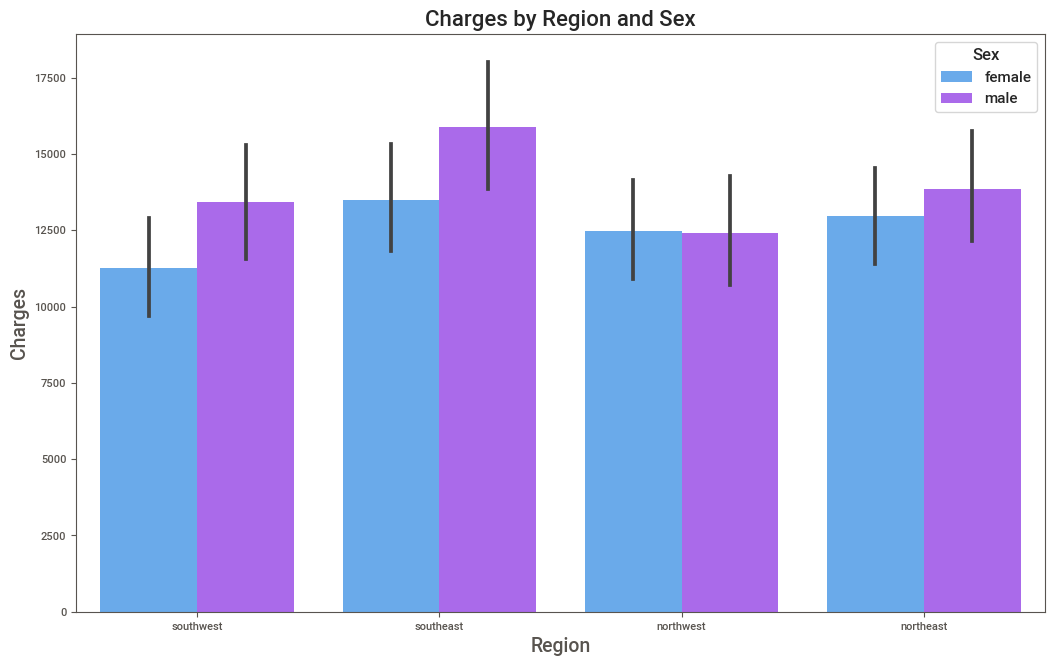

In [76]:
plt.figure(figsize=(12.5,7.5))
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')
# Set labels and title
plt.xlabel('Region', fontsize=14)
plt.ylabel('Charges', fontsize=14)
plt.title('Charges by Region and Sex', fontsize=16)

# Adjust legend
plt.legend(title='Sex')

### Preprocessing Data 

In [77]:
print(df.dtypes)
print(df.columns)

label = LabelEncoder()
df.sex = label.fit_transform(df.sex)
df.smoker = label.fit_transform(df.smoker)
df.region = label.fit_transform(df.region)


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [78]:
print(df.dtypes)
print(df.columns)

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [80]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


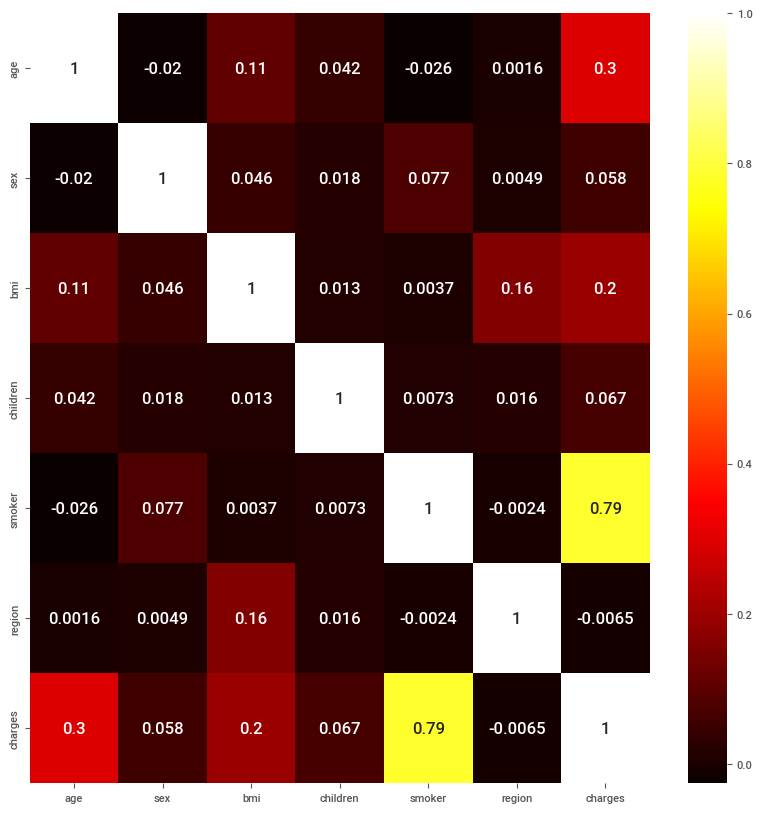

In [81]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='hot')

## Seprating datasets on the basis of input and output

In [82]:
x = df.drop(['charges'], axis = 1)
y = df['charges']


### Train test Split

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Linear Regression Model

In [96]:
# Initialize Linear Regression model
Lin_reg = LinearRegression()

# Fit the model to the training data
Lin_reg.fit(x_train, y_train)

# Predict on training and test data
train_predictions = Lin_reg.predict(x_train)
test_predictions = Lin_reg.predict(x_test)

# Calculate mean squared error on training and test data
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Calculate R^2 score on training data
train_score = Lin_reg.score(x_train, y_train)

# Calculate R^2 score on test data
test_score = Lin_reg.score(x_test, y_test)

# Check if the model is overfitting, underfitting, or well-generalized
model_tendency = ""
if abs(train_score - test_score) <= 0.08:
    model_tendency = "Well-Generalized"
elif train_score > test_score:
    model_tendency = "Overfitting"
else:
    model_tendency = "Underfitting"

# Create a list of metrics and corresponding values including model tendency and losses
metrics_data = [
    ["Intercept", Lin_reg.intercept_],
    ["Coefficients", Lin_reg.coef_],
    ["R^2 Score on Training Data", train_score],
    ["R^2 Score on Test Data", test_score],
    ["Mean Squared Error on Training Data", train_mse],
    ["Mean Squared Error on Test Data", test_mse],
    ["Model Tendency", model_tendency]
]

# Tabulate the metrics
table = tabulate(metrics_data, headers=["Metric", "Value"], tablefmt="grid")

# Print the table
print(table)

+-------------------------------------+--------------------------------------------------------------+
| Metric                              | Value                                                        |
+=====================================+==============================================================+
| Intercept                           | -10658.974155442069                                          |
+-------------------------------------+--------------------------------------------------------------+
| Coefficients                        | [  244.40254189  -203.81680641   308.01805142   495.56546634 |
|                                     |  23771.78167483  -377.96465113]                              |
+-------------------------------------+--------------------------------------------------------------+
| R^2 Score on Training Data          | 0.7487799749798774                                           |
+-------------------------------------+----------------------------------

### Ridge

In [97]:

# Initialize Ridge Regression model with alpha=0.5
ridge_reg = Ridge(alpha=0.5)

# Fit the model to the training data
ridge_reg.fit(x_train, y_train)

# Predict on training and test data
train_predictions = ridge_reg.predict(x_train)
test_predictions = ridge_reg.predict(x_test)

# Calculate mean squared error on training and test data
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Calculate R^2 score on training data
train_score = ridge_reg.score(x_train, y_train)

# Calculate R^2 score on test data
test_score = ridge_reg.score(x_test, y_test)

# Check if the model is overfitting, underfitting, or well-generalized
model_tendency = ""
if abs(train_score - test_score) <= 0.08:
    model_tendency = "Well-Generalized"
elif train_score > test_score:
    model_tendency = "Overfitting"
else:
    model_tendency = "Underfitting"

# Create a list of metrics and corresponding values including model tendency and losses
metrics_data = [
    ["Intercept", ridge_reg.intercept_],
    ["Coefficients", ridge_reg.coef_],
    ["R^2 Score on Training Data", train_score],
    ["R^2 Score on Test Data", test_score],
    ["Mean Squared Error on Training Data", train_mse],
    ["Mean Squared Error on Test Data", test_mse],
    ["Model Tendency", model_tendency]
]

# Tabulate the metrics
table = tabulate(metrics_data, headers=["Metric", "Value"], tablefmt="grid")

# Print the table
print(table)

+-------------------------------------+--------------------------------------------------------------+
| Metric                              | Value                                                        |
+=====================================+==============================================================+
| Intercept                           | -10641.314091338623                                          |
+-------------------------------------+--------------------------------------------------------------+
| Coefficients                        | [  244.34042397  -201.10723643   307.92303881   495.90249348 |
|                                     |  23702.74866396  -377.99799347]                              |
+-------------------------------------+--------------------------------------------------------------+
| R^2 Score on Training Data          | 0.7487745428850912                                           |
+-------------------------------------+----------------------------------

## Lasso

In [98]:

# Initialize Lasso Regression model with alpha=0.2
lasso_reg = Lasso(alpha=0.2, fit_intercept=True, precompute=False, max_iter=1000,
                  tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

# Fit the model to the training data
lasso_reg.fit(x_train, y_train)

# Predict on training and test data
train_predictions = lasso_reg.predict(x_train)
test_predictions = lasso_reg.predict(x_test)

# Calculate mean squared error on training and test data
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Calculate R^2 score on training data
train_score = lasso_reg.score(x_train, y_train)

# Calculate R^2 score on test data
test_score = lasso_reg.score(x_test, y_test)

# Check if the model is overfitting, underfitting, or well-generalized
model_tendency = ""
if abs(train_score - test_score) <= 0.08:
    model_tendency = "Well-Generalized"
elif train_score > test_score:
    model_tendency = "Overfitting"
else:
    model_tendency = "Underfitting"

# Create a list of metrics and corresponding values including model tendency and losses
metrics_data = [
    ["Intercept", lasso_reg.intercept_],
    ["Coefficients", lasso_reg.coef_],
    ["R^2 Score on Training Data", train_score],
    ["R^2 Score on Test Data", test_score],
    ["Mean Squared Error on Training Data", train_mse],
    ["Mean Squared Error on Test Data", test_mse],
    ["Model Tendency", model_tendency]
]

# Tabulate the metrics
table = tabulate(metrics_data, headers=["Metric", "Value"], tablefmt="grid")

# Print the table
print(table)

+-------------------------------------+--------------------------------------------------------------+
| Metric                              | Value                                                        |
+=====================================+==============================================================+
| Intercept                           | -10658.805921365001                                          |
+-------------------------------------+--------------------------------------------------------------+
| Coefficients                        | [  244.40242819  -202.95303181   308.0032782    495.42557944 |
|                                     |  23770.5047471   -377.78642988]                              |
+-------------------------------------+--------------------------------------------------------------+
| R^2 Score on Training Data          | 0.7487799714668091                                           |
+-------------------------------------+----------------------------------

## Random Forest Regressor

In [101]:

# Splitting the data
x = df.drop(['charges'], axis=1)
y = df.charges
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initializing Random Forest Regression model
Rfr = rfr(n_estimators=100, criterion='squared_error', random_state=1, n_jobs=-1)

# Fitting the model to the training data
Rfr.fit(x_train, y_train)

# Predictions on training and test data
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

# Calculating MSE on training and test data
train_mse = metrics.mean_squared_error(y_train, x_train_pred)
test_mse = metrics.mean_squared_error(y_test, x_test_pred)

# Calculating R^2 score on training and test data
train_r2 = metrics.r2_score(y_train, x_train_pred)
test_r2 = metrics.r2_score(y_test, x_test_pred)

# Check if the model is overfitting, underfitting, or well-generalized
model_tendency = ""
if abs(train_r2 - test_r2) <= 0.08:
    model_tendency = "Well-Generalized"
elif train_r2 > test_r2:
    model_tendency = "Overfitting"
else:
    model_tendency = "Underfitting"

# Create a list of metrics and corresponding values including model tendency
metrics_data = [
    ["MSE on Training Data", train_mse],
    ["MSE on Test Data", test_mse],
    ["R^2 Score on Training Data", train_r2],
    ["R^2 Score on Test Data", test_r2],
    ["Model Tendency", model_tendency]
]

# Tabulate the metrics
table = tabulate(metrics_data, headers=["Metric", "Value"], tablefmt="grid")

# Print the table
print(table)

+----------------------------+--------------------+
| Metric                     | Value              |
+============================+====================+
| MSE on Training Data       | 3471446.274242223  |
+----------------------------+--------------------+
| MSE on Test Data           | 21451787.46038197  |
+----------------------------+--------------------+
| R^2 Score on Training Data | 0.9746451839587246 |
+----------------------------+--------------------+
| R^2 Score on Test Data     | 0.8832594310706176 |
+----------------------------+--------------------+
| Model Tendency             | Overfitting        |
+----------------------------+--------------------+


2024-03-05 14:09:58,330 - INFO     - Executing shutdown due to inactivity...
2024-03-05 14:10:10,620 - INFO     - Executing shutdown...
2024-03-05 14:10:10,630 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


## PolyNomial Regression

In [103]:

# Prepare the features and target
x = df.drop(['charges', 'sex', 'region'], axis=1)
y = df.charges

# Create polynomial features
pol = PolynomialFeatures(degree=2)
x_pol = pol.fit_transform(x)

# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.2, random_state=0)

# Initialize Polynomial Regression model
Pol_reg = LinearRegression()

# Fit the model to the training data
Pol_reg.fit(x_train, y_train)

# Predictions on training and test data
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)

# Calculate R^2 score on test data
test_score = Pol_reg.score(x_test, y_test)

# Calculate Mean Squared Error (MSE) on training and test data
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Create a list of metrics and corresponding values
metrics_data = [
    ["Intercept", Pol_reg.intercept_],
    ["Coefficients", Pol_reg.coef_],
    ["R^2 Score on Test Data", test_score],
    ["Mean Squared Error on Training Data", train_mse],
    ["Mean Squared Error on Test Data", test_mse]
]

# Check if the model is overfitting, underfitting, or well-generalized
model_tendency = ""
if abs(train_score - test_score) <= 0.08:
    model_tendency = "Well-Generalized"
elif train_score > test_score:
    model_tendency = "Overfitting"
else:
    model_tendency = "Underfitting"

# Add model tendency to the metrics data
metrics_data.append(["Model Tendency", model_tendency])

# Tabulate the metrics
table = tabulate(metrics_data, headers=["Metric", "Value"], tablefmt="grid")

# Print the table
print(table)

+-------------------------------------+------------------------------------------------------------------+
| Metric                              | Value                                                            |
+=====================================+==================================================================+
| Intercept                           | -4154.172427990896                                               |
+-------------------------------------+------------------------------------------------------------------+
| Coefficients                        | [ 0.00000000e+00  4.58324545e-01  4.03405523e+02  1.40260553e+03 |
|                                     |  -1.12260916e+04  3.01311573e+00  3.24610178e-01 -5.35321284e-01 |
|                                     |   2.51089226e+01 -6.58358646e+00 -8.22584809e+00  1.48200077e+03 |
|                                     |  -1.41284021e+02 -3.75316527e+01 -1.12260916e+04]                |
+------------------------------------